Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

**Librerias utilizadas:**

In [144]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [145]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

# Parte I. Serie de Tiempo

## 1) 

### Introducción

-Serie de datos analizada: "pasajeros monterrey"


-Mide la afluencia mensual en el sistema de transporte colectivo metrorrey en miles de pasajeros

In [146]:
pm = pd.read_csv('https://raw.githubusercontent.com/Miltonmtz/Tareas_EstadisticaAplicada_22/master/pmetrorrey.csv',index_col='Periodo', parse_dates = True)

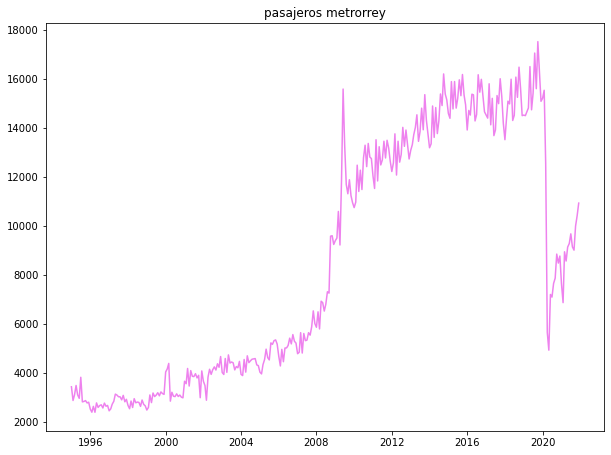

In [147]:
#graficamos
plt.plot(pm, "violet")
plt.title(r'pasajeros metrorrey')
plt.show()

Observamos que los pasajeros van en aumento conforme pasan los años

## 2)

En efecto, observamos un comportamiento estacional

Los meses en los que suele aumentar la variable son: marzo, mayo y octubre
   -No encuentro una razón especifica para estos aumentos
    
Los meses en los que suele disminuir la variable son: enero, febrero y junio
   -En enero aun están terminando las vacaciones de fin de año, hay menos gente     en la ciudad y la gente que está sale menos porque se suele pasar mas           tiempo en familia
   -En febrero es claro, hay 2 o 3 dias menos que el resto de los meses
   -En junio tambien hay época vacacional, hay menos gente en la ciudad

## 3)

En el caso de esta serie de tiempo

Conocer un pronóstico de la serie de tiempo es muy importante para la empresa de Metrorrey

Esto se debe a que, si conocen el comportamiento de la cantidad de pasajeros que usan su servicio, pueden prepararse ante las situaciones que se pronosticaron

Por ejemplo: se pueden realizar mantenimiento a los vagones en la epoca con menos afluencia o se podrian contratar conductores extras solo para las temporadas en las que se esperan más pasajeros

## 4)

Estadísticas descriptivas serie de Pasajeros de Metrorrey

In [148]:
print('Rango de fechas:', min(pm.index.date), '-', max(pm.index.date))
print('Numero de observaciones:', pm.shape[0])
print(f'Media: {pm.Miles_de_pasajeros.mean():.4f}')
print(f'Mediana: {pm.Miles_de_pasajeros.median():.4f}')
print(f'Mínimo: {pm.Miles_de_pasajeros.min():.4f}')
print(f'Máximo: {pm.Miles_de_pasajeros.max():.4f}')
print(f'Desviación Estándar: {pm.Miles_de_pasajeros.std():.4f}')
print(f'Skewness (símetría): {pm.Miles_de_pasajeros.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {pm.Miles_de_pasajeros.kurtosis():.4f}')     ## que tan alta esta la dist

Rango de fechas: 1995-01-01 - 2021-12-01
Numero de observaciones: 324
Media: 8477.4140
Mediana: 6674.0000
Mínimo: 2397.0000
Máximo: 17534.5230
Desviación Estándar: 5005.2280
Skewness (símetría): 0.2477
Kurtosis: -1.6368


## 5)

In [149]:
pm['SMA-3']= pm['Miles_de_pasajeros'].rolling(window = 3).mean()
pm['SMA-6']= pm['Miles_de_pasajeros'].rolling(window = 6).mean()

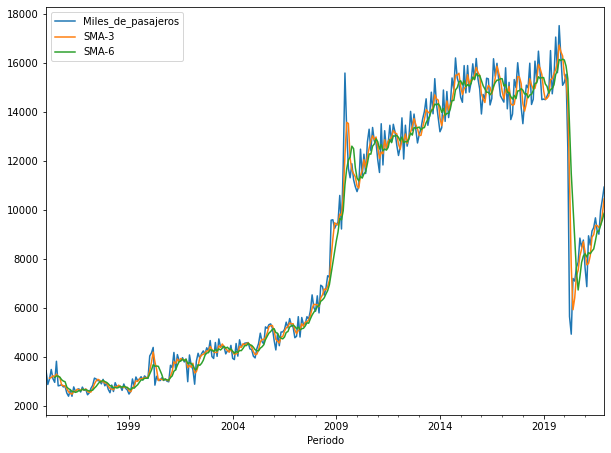

In [150]:
pm.plot();

## 6)

In [151]:
result = seasonal_decompose(pm['Miles_de_pasajeros'], model='mul')

<AxesSubplot:xlabel='Periodo'>

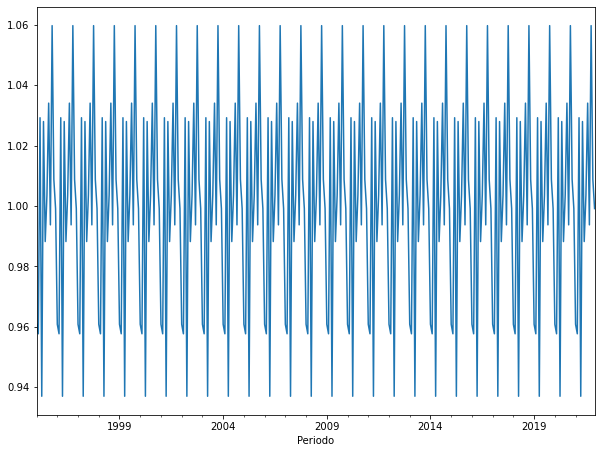

In [152]:
result.seasonal.plot()

In [153]:
print(result.seasonal)

Periodo
1995-01-01    0.960861
1995-02-01    0.957726
1995-03-01    1.029199
1995-04-01    0.937057
1995-05-01    1.027940
                ...   
2021-08-01    1.034028
2021-09-01    0.993759
2021-10-01    1.059664
2021-11-01    1.008783
2021-12-01    0.999132
Name: seasonal, Length: 324, dtype: float64


In [154]:
print(*result.seasonal, sep = "\n")

0.9608606827527668
0.9577262599091144
1.029199091734017
0.9370568431475248
1.0279396831874026
0.9882360634437946
1.0036155255303367
1.0340275424089587
0.993758597579394
1.0596640507522845
1.0087831611316678
0.9991324984227362
0.9608606827527668
0.9577262599091144
1.029199091734017
0.9370568431475248
1.0279396831874026
0.9882360634437946
1.0036155255303367
1.0340275424089587
0.993758597579394
1.0596640507522845
1.0087831611316678
0.9991324984227362
0.9608606827527668
0.9577262599091144
1.029199091734017
0.9370568431475248
1.0279396831874026
0.9882360634437946
1.0036155255303367
1.0340275424089587
0.993758597579394
1.0596640507522845
1.0087831611316678
0.9991324984227362
0.9608606827527668
0.9577262599091144
1.029199091734017
0.9370568431475248
1.0279396831874026
0.9882360634437946
1.0036155255303367
1.0340275424089587
0.993758597579394
1.0596640507522845
1.0087831611316678
0.9991324984227362
0.9608606827527668
0.9577262599091144
1.029199091734017
0.9370568431475248
1.0279396831874026
0.

In [155]:
compestacional = result.seasonal

In [156]:
pm['desestacionalizado']= pm['Miles_de_pasajeros']/compestacional

In [157]:
pm.head(12)

,Miles_de_pasajeros,SMA-3,SMA-6,desestacionalizado
Periodo,,,,
1995-01-01,3439.0,NaN,NaN,3579.082859
1995-02-01,2879.0,NaN,NaN,3006.078167
1995-03-01,3103.0,3140.333333,NaN,3014.965739
1995-04-01,3491.0,3157.666667,NaN,3725.494377
1995-05-01,3109.0,3234.333333,NaN,3024.496525
1995-06-01,2966.0,3188.666667,3164.500000,3001.307187
1995-07-01,3826.0,3300.333333,3229.000000,3812.216833
1995-08-01,2822.0,3204.666667,3219.500000,2729.134268
1995-09-01,2840.0,3162.666667,3175.666667,2857.836910


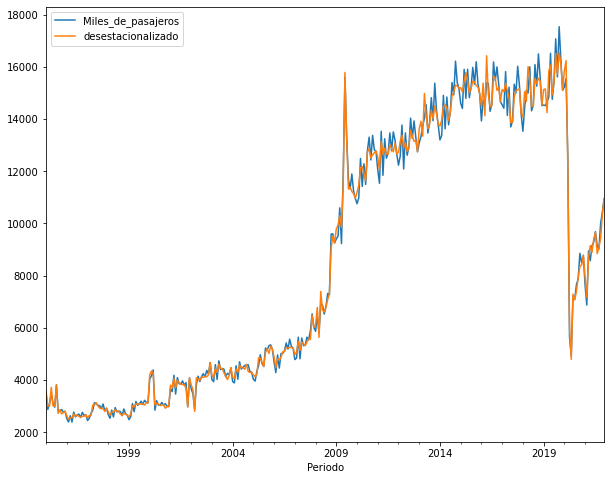

In [158]:
pm[['Miles_de_pasajeros','desestacionalizado']].plot(figsize=(10,8));

## 7)

In [159]:
pm['desestacionalizado'].head(12)

Periodo
1995-01-01    3579.082859
1995-02-01    3006.078167
1995-03-01    3014.965739
1995-04-01    3725.494377
1995-05-01    3024.496525
1995-06-01    3001.307187
1995-07-01    3812.216833
1995-08-01    2729.134268
1995-09-01    2857.836910
1995-10-01    2712.180335
1995-11-01    2753.812818
1995-12-01    2809.437191
Name: desestacionalizado, dtype: float64

## 8)

In [160]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(pm['desestacionalizado'])

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.627936


$H_0$: serie no estacionaria

In [161]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value = 0.628
 NO se rechaza hipótesis nula, serie no estacionaria


In [162]:
des_diff = pm['desestacionalizado'] - pm['desestacionalizado'].shift()

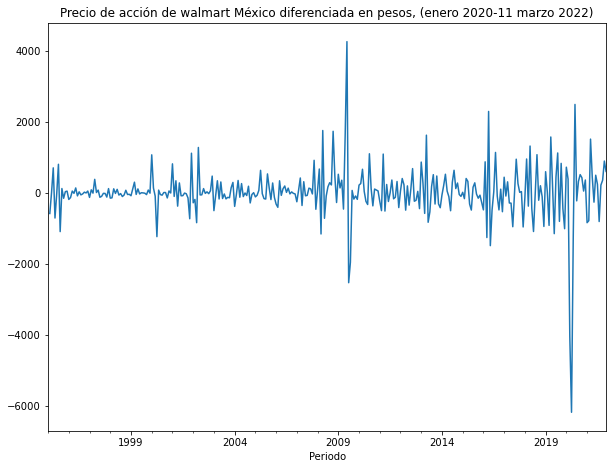

In [163]:
#graficamos el tipo de cambio diferenciado
des_diff.plot()
plt.title('Precio de acción de walmart México diferenciada en pesos, (enero 2020-11 marzo 2022)')
plt.show()

In [164]:
des_diff.head()

Periodo
1995-01-01           NaN
1995-02-01   -573.004692
1995-03-01      8.887572
1995-04-01    710.528638
1995-05-01   -700.997852
Name: desestacionalizado, dtype: float64

In [165]:
#eliminamos los Nan
des_diff = des_diff.dropna()

In [166]:
#hacemos la prueba de dickey fuller aumentada ADF
adf2 = adfuller(des_diff)

#presentamos el p-value
print('p-value: %f' % adf2[1])

p-value: 0.000000


$H_0$: serie no estacionaria

In [167]:
if adf2[1] < 0.05:
    
    print(f'con un un p-value={adf2[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf2[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


Ahora que la serie ya es estacionaria, podemos hacer pronósticos con ella
por tanto debemos identificar que tipo de proceso es

## 9)

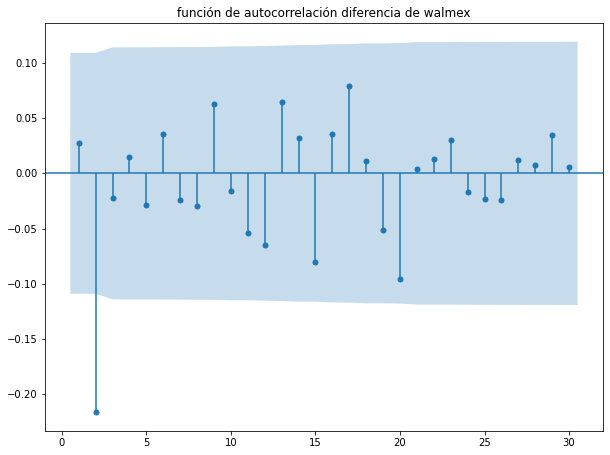

In [168]:
#grafica de autocorrelación ACF
plot_acf(des_diff, zero=False, lags=30)
plt.title('función de autocorrelación diferencia de walmex')
plt.show()

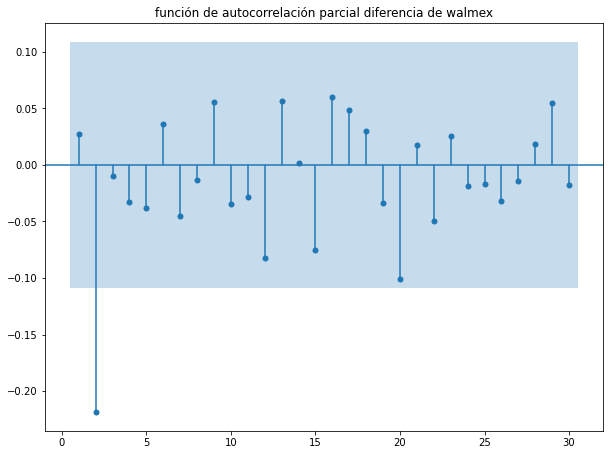

In [169]:
#grafica de autocorrelación parcial PACF
plot_pacf(des_diff, zero=False, lags=30)
plt.title('función de autocorrelación parcial diferencia de walmex')
plt.show()

Proceso ARMA(2,2)

In [170]:
# estimamos un ARMA (2,2)
modelo = ARIMA(des_diff, order=(2, 0, 2))
resultado = modelo.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  323
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2578.255
Date:                Tue, 24 May 2022   AIC                           5168.510
Time:                        10:20:33   BIC                           5191.176
Sample:                    02-01-1995   HQIC                          5177.558
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8167     33.746      0.676      0.499     -43.324      88.957
ar.L1          0.1363      0.228      0.598      0.550      -0.311       0.583
ar.L2         -0.0903      0.271     -0.333      0.739      -0.621       0.441
ma.L1         -0.1082      0.235     -0.460      0.645      -0.569       0.353
ma.L2         -0.1368      0.277     -0.494      0.621      -0.680       0.406
sigma2      5.051e+05   1.75e+04     28.823      0.000    4.71e+05    5.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6521.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$Y_t = 22.8167 + 0.1363Y_{t-1} - 0.0903Y_{t-2} - 0.1082\varepsilon_{t-1} - 0.1368\varepsilon_{t-2}$

## 10)

In [171]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            print("Hay un 0")
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [172]:
ic = {}
for ar in range(3):
    for ma in range(3):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(des_diff, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency in

AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency in

AR: 2, MA: 0
AR: 2, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency in

AR: 2, MA: 2


AIC          BIC
AR MA                          
0  0   5176.820628  5184.375933
   1   5178.396702  5189.729659
   2   5165.080314  5180.190923
1  0   5178.577544  5189.910501
   1   5175.865146  5190.975755
   2   5166.661462  5185.549724
2  0   5164.922354  5180.032963
   1   5166.870162  5185.758424
   2   5168.510232  5191.176146

**Criterio Akaike**

In [173]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
2  0   5164.922354  5180.032963
0  2   5165.080314  5180.190923
1  2   5166.661462  5185.549724
2  1   5166.870162  5185.758424
   2   5168.510232  5191.176146
1  1   5175.865146  5190.975755
0  0   5176.820628  5184.375933
   1   5178.396702  5189.729659
1  0   5178.577544  5189.910501

**Criterio bayesiano de información**

In [174]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  0   5164.922354  5180.032963
0  2   5165.080314  5180.190923
   0   5176.820628  5184.375933
1  2   5166.661462  5185.549724
2  1   5166.870162  5185.758424
0  1   5178.396702  5189.729659
1  0   5178.577544  5189.910501
   1   5175.865146  5190.975755
2  2   5168.510232  5191.176146

In [175]:
## removeremos la fecha
UNK = des_diff.reset_index()

### eliminamos columna fecha
UNK = UNK.drop(['Periodo'], axis=1)

In [176]:
UNK = UNK.dropna()
UNK

,desestacionalizado
0,-573.004692
1,8.887572
2,710.528638
3,-700.997852
4,-23.189338
...,...
318,-799.338680
319,224.990953
320,362.110831
321,902.078597


# ARMA(1,1)

In [177]:
# estimamos un ARMA (1,1)
modelo = ARIMA(UNK, order=(1, 0, 1))
resultado11 = modelo.fit()
resultado11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  323
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2583.933
Date:                Tue, 24 May 2022   AIC                           5175.865
Time:                        10:20:35   BIC                           5190.976
Sample:                             0   HQIC                          5181.897
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8168     45.934      0.497      0.619     -67.212     112.845
ar.L1         -0.5565      0.270     -2.063      0.039      -1.085      -0.028
ma.L1          0.6602      0.265      2.488      0.013       0.140       1.180
sigma2      5.299e+05   1.76e+04     30.186      0.000    4.95e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):              4787.83
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               7.36   Skew:                            -1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
UNK11 = UNK.copy()

In [179]:
# vamos a estimar la serie con el modelo ARMA (1,1)
UNK11['pronostico'] = resultado11.predict(0,322)

In [180]:
UNK11.head()

,desestacionalizado,pronostico
0,-573.004692,22.816754
1,8.887572,-32.953956
2,710.528638,58.010539
3,-700.997852,69.677370
4,-23.189338,-82.569901


In [181]:
MAPE11 = mean_absolute_percentage_error(UNK11['desestacionalizado'], UNK11['pronostico'])
MAPE11

195.9944225152072

### ARMA(2,1)

In [182]:
# estimamos un ARMA (2,1)
modelo = ARIMA(UNK, order=(2, 0, 1))
resultado21 = modelo.fit()
resultado21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  323
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2578.435
Date:                Tue, 24 May 2022   AIC                           5166.870
Time:                        10:20:36   BIC                           5185.758
Sample:                             0   HQIC                          5174.410
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8166     35.272      0.647      0.518     -46.315      91.949
ar.L1          0.1021      0.236      0.432      0.666      -0.361       0.565
ar.L2         -0.2195      0.039     -5.616      0.000      -0.296      -0.143
ma.L1         -0.0729      0.245     -0.298      0.766      -0.553       0.407
sigma2       5.05e+05   1.72e+04     29.406      0.000    4.71e+05    5.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6280.04
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.63   Skew:                            -1.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
UNK21 = UNK.copy()

In [184]:
# vamos a estimar la serie con el modelo ARMA (1,1)
UNK21['pronostico'] = resultado21.predict(0,322)

In [185]:
UNK21.head()

,desestacionalizado,pronostico
0,-573.004692,22.816634
1,8.887572,6.812223
2,710.528638,152.036167
3,-700.997852,55.410718
4,-23.189338,-146.926032


In [186]:
MAPE21 = mean_absolute_percentage_error(UNK21['desestacionalizado'], UNK21['pronostico'])
MAPE21

221.87276070842833

### ARMA(1,2)

In [187]:
# estimamos un ARMA (1,2)
modelo = ARIMA(UNK, order=(1, 0, 2))
resultado12 = modelo.fit()
resultado12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  323
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2578.331
Date:                Tue, 24 May 2022   AIC                           5166.661
Time:                        10:20:38   BIC                           5185.550
Sample:                             0   HQIC                          5174.201
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8166     32.942      0.693      0.489     -41.749      87.382
ar.L1          0.1497      0.229      0.653      0.514      -0.300       0.599
ma.L1         -0.1226      0.234     -0.523      0.601      -0.582       0.337
ma.L2         -0.2218      0.042     -5.295      0.000      -0.304      -0.140
sigma2      5.055e+05    1.7e+04     29.710      0.000    4.72e+05    5.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6667.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [188]:
UNK12 = UNK.copy()

In [189]:
# vamos a estimar la serie con el modelo ARMA (1,1)
UNK12['pronostico'] = resultado12.predict(0,322)

In [190]:
UNK12.head()

,desestacionalizado,pronostico
0,-573.004692,22.816572
1,8.887572,6.630223
2,710.528638,146.434942
3,-700.997852,57.078804
4,-23.189338,-117.912899


In [191]:
MAPE12 = mean_absolute_percentage_error(UNK12['desestacionalizado'], UNK12['pronostico'])
MAPE12

227.71952994745072

### ARMA(2,2)

In [192]:
# estimamos un ARMA (2,2)
modelo = ARIMA(UNK, order=(2, 0, 2))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  323
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2578.255
Date:                Tue, 24 May 2022   AIC                           5168.510
Time:                        10:20:39   BIC                           5191.176
Sample:                             0   HQIC                          5177.558
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8167     33.746      0.676      0.499     -43.324      88.957
ar.L1          0.1363      0.228      0.598      0.550      -0.311       0.583
ar.L2         -0.0903      0.271     -0.333      0.739      -0.621       0.441
ma.L1         -0.1082      0.235     -0.460      0.645      -0.569       0.353
ma.L2         -0.1368      0.277     -0.494      0.621      -0.680       0.406
sigma2      5.051e+05   1.75e+04     28.823      0.000    4.71e+05    5.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6521.51
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [193]:
UNKr = UNK.copy()

In [194]:
# vamos a estimar la serie con el modelo ARMA (2,2)
UNKr['pronostico'] = resultado.predict(0,322)

In [195]:
UNKr.head()

,desestacionalizado,pronostico
0,-573.004692,22.816671
1,8.887572,6.509920
2,710.528638,151.916089
3,-700.997852,57.574703
4,-23.189338,-132.342143


In [196]:
MAPE22 = mean_absolute_percentage_error(UNKr['desestacionalizado'], UNKr['pronostico'])
MAPE22

227.82295012330286

## 12)

¿Qué modelo se debería estimar según AIC? 

ARMA(1,2)

## 13)

¿Qué modelo se debe estimar según BIC?

ARMA(1,2)

## 14)

¿Qué modelo se debe estimar según la medida elegida (MAPE)?

ARMA(1,1)

## 15)

Modelo elegido ARMA(2,2)

In [197]:
# estimamos un ARIMA (2,2)
modelo2 = ARIMA(pm['desestacionalizado'], order=(2, 1, 2))
resultado2 = modelo2.fit()
resultado2.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     desestacionalizado   No. Observations:                  324
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2578.591
Date:                Tue, 24 May 2022   AIC                           5167.182
Time:                        10:20:42   BIC                           5186.070
Sample:                    01-01-1995   HQIC                          5174.722
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1147      0.234      0.491      0.623      -0.343       0.572
ar.L2         -0.0792      0.272     -0.291      0.771      -0.612       0.454
ma.L1         -0.0884      0.240     -0.368      0.713      -0.559       0.383
ma.L2         -0.1447      0.278     -0.520      0.603      -0.690       0.400
sigma2       5.06e+05   1.74e+04     29.117      0.000    4.72e+05     5.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6580.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.54   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
# vamos a estimar la serie con el modelo ARIMA
pm['pronostico'] = resultado2.predict()
pm['pronostico'][0] = pm['desestacionalizado'][0]

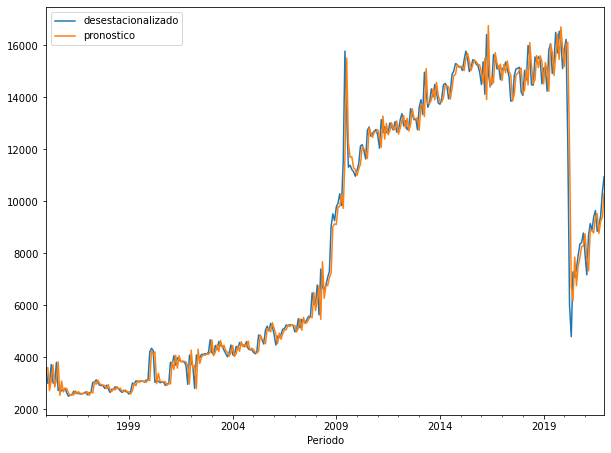

In [199]:
pm[['desestacionalizado', 'pronostico']].plot()
plt.show()

In [200]:
## vamos a pronosticar los siguientes 5 periodos
resultado2.predict(323, 327)

2021-12-01    10301.326305
2022-01-01    10753.996677
2022-02-01    10589.667026
2022-03-01    10586.251237
2022-04-01    10598.867127
Freq: MS, Name: predicted_mean, dtype: float64

## 16)

La limitación del pronostico con modelo ARIMA es que solo es efectivo a corto plazo, al tratar de hacer un pronóstico más lejano este converge a una constante